## Ejercicios Propuestos
#### El número de procesadores i7 que entran a un sistema de producción sigue una distribución de Poisson con media de 2 piezas/hora. Simule el comportamiento de la llegada de los procesadores al sistema

In [214]:
import math
import numpy as np
import pandas  as pd
from matplotlib import pyplot as plt
import scipy.stats as st 

In [215]:
def probabilidad(n,lamda):
    sum = 0
    probabilidad = []
    sumatorias = []
    for i in range(n):
        prob = (math.exp(-lamda)*lamda**i)/math.factorial(i)
        probabilidad.append(prob)
        sum += prob
        sumatorias.append(sum)
        if(sum >= 1):
            probabilidad.pop()
            sumatorias.pop()
            return;
    
    return probabilidad, sumatorias

def comprobar(alt, suma):
    num = []
    for i in range(len(alt)):
        for j in range(len(suma)):
            if(suma[j] > alt[i]):
                num.append(j)
                break;
    return num;

In [216]:
lamda = 2
n = 10

prob = probabilidad(n,lamda)[0]
suma = probabilidad(n,lamda)[1]
print(suma)

[0.1353352832366127, 0.4060058497098381, 0.6766764161830635, 0.8571234604985472, 0.9473469826562889, 0.9834363915193857, 0.9954661944737513, 0.9989032810321414, 0.999762552671739, 0.9999535019249829]


### 1.5. Algoritmo de Blum, Blum y Shub

Si en el algoritmo congruencial cuadrático $a=1, b=0, c=0$, entonces se construye una nueva ecuación recursiva:

> $X_{i+1}=(X_i^2)mod(m) \hspace{1cm} i=0,1,2,3,...N$

Fue propuesta como un nuevo método para generar números que no tienen un comportamiento predecible.

Adicionalmente, $m$ debe ser la multiplicación de 2 números primos grandes

Números pseudoaleatorios generados a través del tiempo:


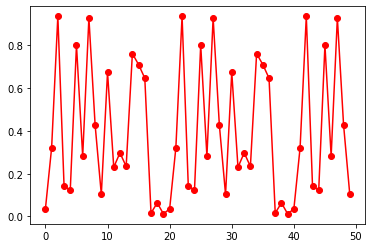

In [229]:
def algoritmo_cuadratico(semilla,a,b,c,m):
  entero = (a*semilla**2+b*semilla+c)%m
  r = entero/(m-1)
  return r,entero

cantidad = 50
semilla = 3
pseudoaleatorios = []
for i in range(cantidad):
  r,semilla = algoritmo_cuadratico(semilla,a=1,b=0,c=0,m=11*23)
  pseudoaleatorios.append(r)

df = pd.DataFrame({'column':pseudoaleatorios}) 
df.to_csv('lab_01_algoritmo_blum_blum.csv', index=False, header=['aleatorio'],sep=';',decimal='.')
df.to_csv('lab_01_algoritmo_blum_blum.txt', index=False, header=['aleatorio'],sep=';',decimal='.')

print("Números pseudoaleatorios generados a través del tiempo:")
plt.plot(range(cantidad),pseudoaleatorios, marker="o", color="red")
plt.show()

## 2. Pruebas de uniformidad

Busca determinar si los números del conjunto $r_i$ se distribuyen de manera uniforme en el intervalo (0,1). Es necesario dividir el intervalo (0,1) en $m$ sub-intervalos, en donde es recomendable $m=\sqrt{n}$. Luego se clasifica cada número cada número pseudoaleatorio $r_i$ en los $m$ intervalos. Donde $O_i$ es la frecuencia observada y $E_i$ es la frecuencia esperada. $E_i$ es teóricamente igual a $n/m$.

> $\mathcal{X}_0^2=\sum_{i=1}^{m}\frac{(E_i-O_i)^2}{E_i}$

Si el valor estadístico $\mathcal{X}_0^2$ es menor al valor de tablas de $\mathcal{X}_{\alpha,m-1}^2$, entonces no se puede rechazar que el conjunto de numeros $r_i$ sigue una distribución uniforme. En caso contrario, se rechaza que $r_i$ sigue una distribución uniforme.

In [230]:
def prueba_chi_cuadrada(pseudoaleatorios):
  n = len(pseudoaleatorios)
  m = int(n**0.5)
  intervalo = 1/m
  frec_esperada = np.ones(m)*(n/m)
  frec_observada = np.zeros(m)
  for pseudoaleatorio in pseudoaleatorios:
    posicion = int(pseudoaleatorio/intervalo) if pseudoaleatorio!=1 else m-1
    frec_observada[posicion] += 1
  return ((frec_esperada-frec_observada)**2/frec_esperada).sum()

datos = np.array(pseudoaleatorios)
print("El estadístico chi-cuadrada es: ",prueba_chi_cuadrada(datos))
a = 0.05
print("Tabla", st.chi2.ppf( 1 - (a/2), int(len(datos)**0.5) - 1))

El estadístico chi-cuadrada es:  13.84
Tabla 14.44937533544792


## 3. Pruebas de independencia

### 3.1 Prueba de corridas arriba y abajo

El procedimiento de esta prueba consiste en determinar una secuencia de números ($S$) que solo contienen unos y ceros, de acuerdo con la comparación entre $r_i$ y $r_{i-1}$ (cero si el número $r_i$ es menor que $r_{i-1}$, caso contrario uno). Después se determina el número de corridas observadas, $C_O$ (cantidad de unos o ceros consecutivos). Luego se calcula el valor esperado, la varianza del número de corridas y el estadístico $Z_0$ mediante las ecucaciones:

> $\mu_{C_O} = \frac{2n-1}{3}$

> $\sigma_{C_O}^2=\frac{16n-29}{90}$3

> $Z_0 = \lvert \frac{C_O - \mu_{C_O}}{\sigma_{C_O}} \rvert$

Si el estadístico $Z_0$ es mayor que el valor crítico $Z_{\alpha,2}$, se concluye que los números del conjunto $r_i$ no son independientes. De lo contrario no se puede rechazar que el conjunto de $r_i$ sea independiente.

In [231]:
pseudoaleatorios = np.array(pseudoaleatorios)
n = len(pseudoaleatorios)
s = np.floor(np.diff(pseudoaleatorios) + 1).astype(int) #diff encuentra la diferencia entre numeros consecutivos, diff[0 1 2] = [1 1], floor y +1 son artificio para cumplir la condicion de s
compresion = [valor for indice,valor in enumerate(s) if indice == 0 or valor != s[indice-1]] #crea un array sin valores consecutivos repetidos, [1 2 2 3] -> [1 2 3]
corridas = len(compresion)
media = (2*n-1)/3
varianza = (16*n-29)/90
Z_0 = abs((corridas-media)/varianza**0.5)
print("El estadístico Z_0 es: ", Z_0)

El estadístico Z_0 es:  0.34165994425704577


Como el estadístico $Z_0 = 0.341659$ es menor que el valor de la tabla de la normal estándar para $Z_{\alpha,2}=Z_{5\%,2}=1.96$, se concluye que no se puede rechazar que los números del conjunto $r_i$ son independientes.

## 4. POISSON


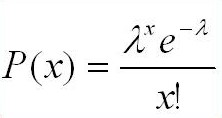

In [239]:
from PIL import Image
Image.open("poisson.JPG")

In [232]:
poison = comprobar(pseudoaleatorios, suma)
print(poison)

[0, 1, 4, 1, 0, 3, 1, 4, 2, 0, 2, 1, 1, 1, 3, 3, 2, 0, 0, 0, 0, 1, 4, 1, 0, 3, 1, 4, 2, 0, 2, 1, 1, 1, 3, 3, 2, 0, 0, 0, 0, 1, 4, 1, 0, 3, 1, 4, 2, 0]


C:\Users\NAIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Poisson'), Text(0, 0.5, 'Frequency')]

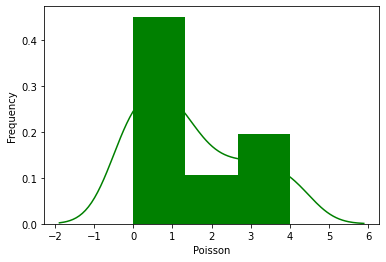

In [233]:
import seaborn as sb
ax = sb.distplot(poison,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')

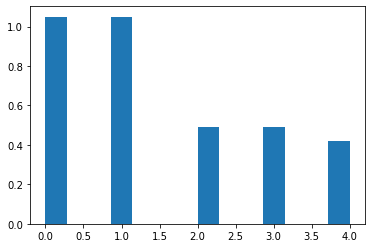

In [234]:
count, bins, ignored = plt.hist(poison, 14, density = True) 
plt.show()